# Simple Fully-Connected Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras

# List available datasets


In [2]:
# !pip install importlib-resources
# !pip install tensorflow-datasets
import tensorflow_datasets as tfds

# List available datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split = ['train', 'test'],
    shuffle_files=True,
    data_dir = 'data/',
    as_supervised=True,
    with_info=True,
)

# print(ds_info)

# Visualization

In [4]:
sample = ds_train.take(6)  # Only take a sample

for example in sample:
    image, label = example[0], example[1]
    print(label.numpy())

4
1
0
7
8
1


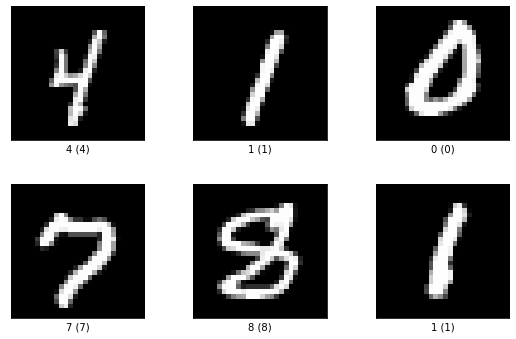

In [5]:
fig = tfds.show_examples(sample, ds_info)

In [6]:
tfds.as_dataframe(ds_train.take(5), ds_info)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


# Keras Pipeline
## Train Pipeline

In [7]:
def normalization(image, label):
    return tf.cast(image, tf.float32) / 255., label

def invert(image, label):
        return (tf.cast(image, tf.float32) * -1.0) + 1.0, label


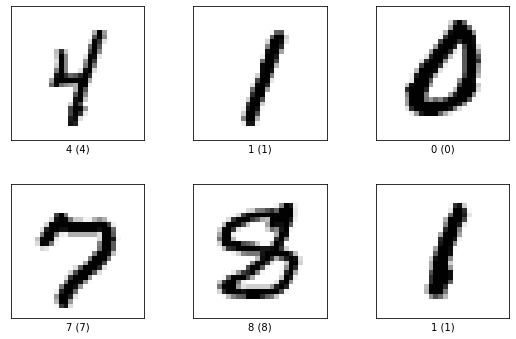

In [8]:
ds_train = ds_train.map(invert, num_parallel_calls=tf.data.AUTOTUNE)

sample = ds_train.take(6)  # Only take a sample
fig = tfds.show_examples(sample, ds_info)

In [9]:
ds_train = ds_train.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)

### Performance Tips

In [10]:
# Cache it before shuffling for a better performance
ds_train = ds_train.cache()

# For randomness
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

# Get unique batches at each epoch.
ds_train = ds_train.batch(128)

# It is good practice to end the pipeline by prefetching for performance.
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

## Test Pipeline

In [11]:
ds_test = ds_test.map(invert, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create Simple Model

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
    verbose = False
)

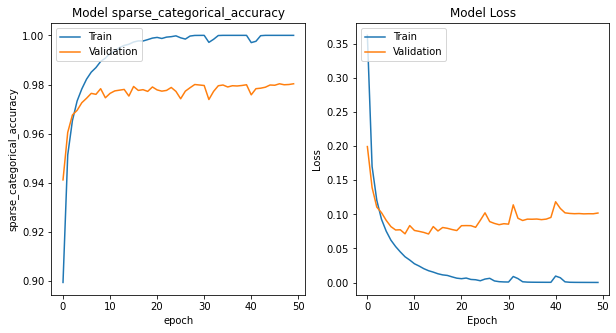

In [26]:
from utils import plot_history

plot_history(history)

In [27]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [28]:
history.history['val_sparse_categorical_accuracy'][-1]

0.9803000092506409

# Serializing Model

In [31]:
model.save('models/simple_mnist_model.h5')

## Load Model

In [33]:
reconstructed_model = tf.keras.models.load_model("models/simple_mnist_model.h5")

In [34]:
reconstructed_model.evaluate(ds_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.1019 - sparse_categorical_accuracy: 0.9803


[0.10191243141889572, 0.9803000092506409]